In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [47]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving TFR for Liberia.csv to TFR for Liberia (1).csv
User uploaded file "TFR for Liberia (1).csv" with length 532 bytes


Read the dataset.

In [39]:
df = pd.read_csv('TFR for Liberia.csv')
display(df.head())

,YEAR,TFR
0,1980,6.872
1,1981,6.834
2,1982,6.788
3,1983,6.760
4,1984,6.728


In [48]:
# 2. BASIC SUMMARY STATISTICS
print("\nSUMMARY STATISTICS:")
print(df.describe())

print("\nMISSING VALUES:")
print(df.isna().sum())


SUMMARY STATISTICS:
              YEAR        TFR  TFR_change  TFR_pct_change    TFR_MA3
count    44.000000  44.000000   43.000000       43.000000  42.000000
mean   2001.500000   5.601205   -0.067953       -1.276678   5.610040
std      12.845233   0.909326    0.035858        0.756225   0.871647
min    1980.000000   3.950000   -0.154000       -2.890390   4.018333
25%    1990.750000   4.848000   -0.086500       -1.806350   4.892417
50%    2001.500000   5.713500   -0.065000       -1.121869   5.712667
75%    2012.250000   6.334750   -0.045000       -0.720142   6.313000
max    2023.000000   6.872000    0.013000        0.236106   6.831333

MISSING VALUES:
YEAR              0
TFR               0
TFR_change        1
TFR_pct_change    1
TFR_MA3           2
dtype: int64


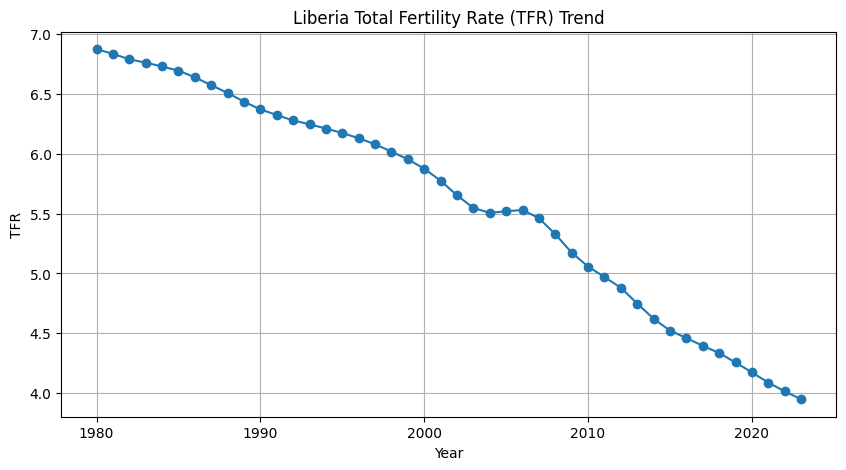

In [49]:
# 3. TREND VISUALIZATION
plt.figure(figsize=(10,5))
plt.plot(df["YEAR"], df["TFR"], marker="o")
plt.title("Liberia Total Fertility Rate (TFR) Trend")
plt.xlabel("Year")
plt.ylabel("TFR")
plt.grid(True)
plt.show()

In [41]:
# 4. YEAR-TO-YEAR CHANGE
df["TFR_change"] = df["TFR"].diff()
df["TFR_pct_change"] = df["TFR"].pct_change() * 100

print("\nYEAR-TO-YEAR CHANGES:")
print(df[["YEAR","TFR","TFR_change","TFR_pct_change"]])


YEAR-TO-YEAR CHANGES:
    YEAR    TFR  TFR_change  TFR_pct_change
0   1980  6.872         NaN             NaN
1   1981  6.834      -0.038       -0.552969
2   1982  6.788      -0.046       -0.673105
3   1983  6.760      -0.028       -0.412493
4   1984  6.728      -0.032       -0.473373
5   1985  6.693      -0.035       -0.520214
6   1986  6.638      -0.055       -0.821754
7   1987  6.572      -0.066       -0.994275
8   1988  6.507      -0.065       -0.989044
9   1989  6.434      -0.073       -1.121869
10  1990  6.370      -0.064       -0.994716
11  1991  6.323      -0.047       -0.737834
12  1992  6.277      -0.046       -0.727503
13  1993  6.246      -0.031       -0.493866
14  1994  6.210      -0.036       -0.576369
15  1995  6.173      -0.037       -0.595813
16  1996  6.129      -0.044       -0.712781
17  1997  6.079      -0.050       -0.815794
18  1998  6.017      -0.062       -1.019905
19  1999  5.953      -0.064       -1.063653
20  2000  5.875      -0.078       -1.310264
21  2001 

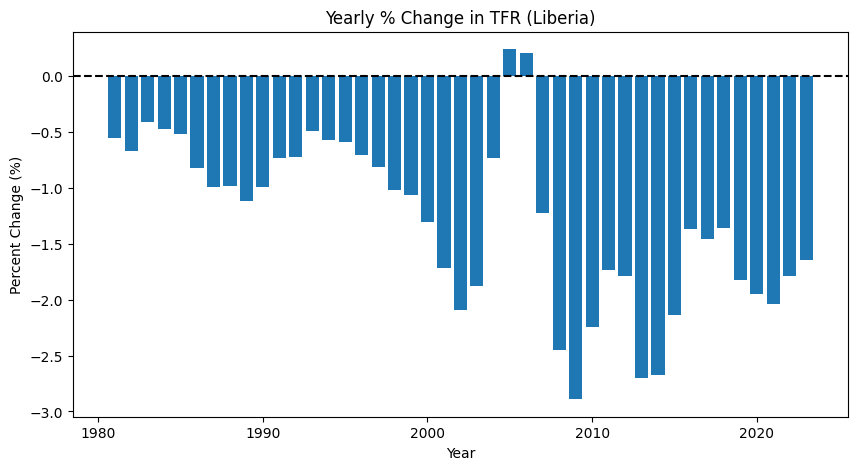

In [42]:
# Plot percent change
plt.figure(figsize=(10,5))
plt.bar(df["YEAR"], df["TFR_pct_change"])
plt.title("Yearly % Change in TFR (Liberia)")
plt.xlabel("Year")
plt.ylabel("Percent Change (%)")
plt.axhline(0, color='black', linestyle='--')
plt.show()

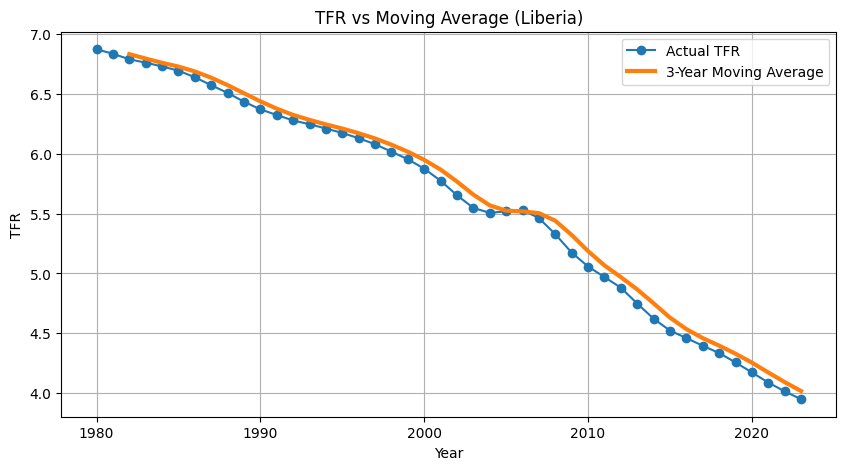

In [43]:
# 5. 3-YEAR MOVING AVERAGE
df["TFR_MA3"] = df["TFR"].rolling(window=3).mean()

plt.figure(figsize=(10,5))
plt.plot(df["YEAR"], df["TFR"], label="Actual TFR", marker="o")
plt.plot(df["YEAR"], df["TFR_MA3"], label="3-Year Moving Average", linewidth=3)
plt.legend()
plt.title("TFR vs Moving Average (Liberia)")
plt.xlabel("Year")
plt.ylabel("TFR")
plt.grid(True)
plt.show()

In [44]:
# 6. FORECASTING (ARIMA)
# Convert to time series index
df_ts = df.set_index("YEAR")

# Fit ARIMA model
model = ARIMA(df_ts["TFR"], order=(2,1,2))
model_fit = model.fit()

print("\nARIMA MODEL SUMMARY:")
print(model_fit.summary())


ARIMA MODEL SUMMARY:
                               SARIMAX Results                                
Dep. Variable:                    TFR   No. Observations:                   44
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 110.792
Date:                Fri, 28 Nov 2025   AIC                           -211.585
Time:                        23:46:38   BIC                           -202.779
Sample:                             0   HQIC                          -208.338
                                 - 44                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8970      0.326      2.754      0.006       0.259       1.535
ar.L2         -0.0851      0.306     -0.278      0.781      -0.686       0.516
ma.L1          0.8849      0.2

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



TFR FORECAST FOR NEXT 5 YEARS:
2024-01-01    3.890604
2025-01-01    3.840851
2026-01-01    3.801276
2027-01-01    3.770011
2028-01-01    3.745332
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


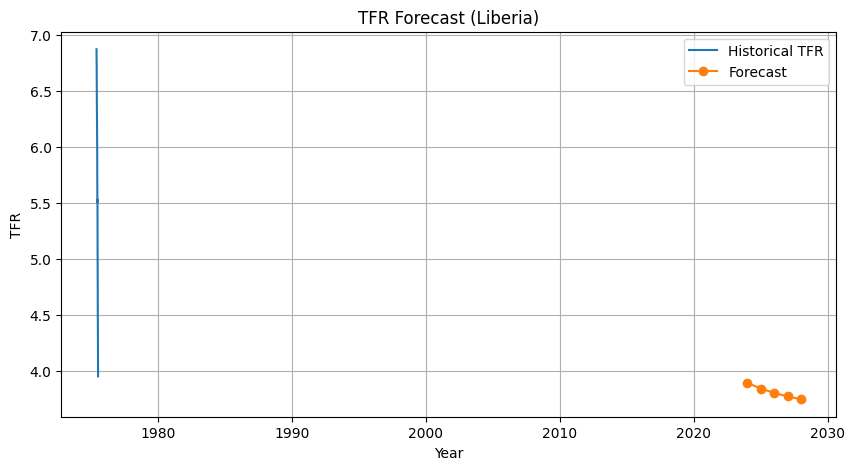

In [45]:
# Forecast next 5 years
forecast = model_fit.forecast(5)

# Create a proper DatetimeIndex for the forecast
last_year = df["YEAR"].max()
forecast_years = pd.to_datetime(np.arange(last_year + 1, last_year + 6), format='%Y')
forecast.index = forecast_years

print("\nTFR FORECAST FOR NEXT 5 YEARS:")
print(forecast)

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(df_ts.index, df_ts["TFR"], label="Historical TFR")
plt.plot(forecast.index, forecast, label="Forecast", marker="o")
plt.xlabel("Year")
plt.ylabel("TFR")
plt.title("TFR Forecast (Liberia)")
plt.legend()
plt.grid(True)
plt.show()


CORRELATION MATRIX:
                    YEAR       TFR  TFR_change  TFR_pct_change   TFR_MA3
YEAR            1.000000 -0.989728   -0.442554       -0.638663 -0.990029
TFR            -0.989728  1.000000    0.440249        0.648183  0.999413
TFR_change     -0.442554  0.440249    1.000000        0.964484  0.395395
TFR_pct_change -0.638663  0.648183    0.964484        1.000000  0.612261
TFR_MA3        -0.990029  0.999413    0.395395        0.612261  1.000000


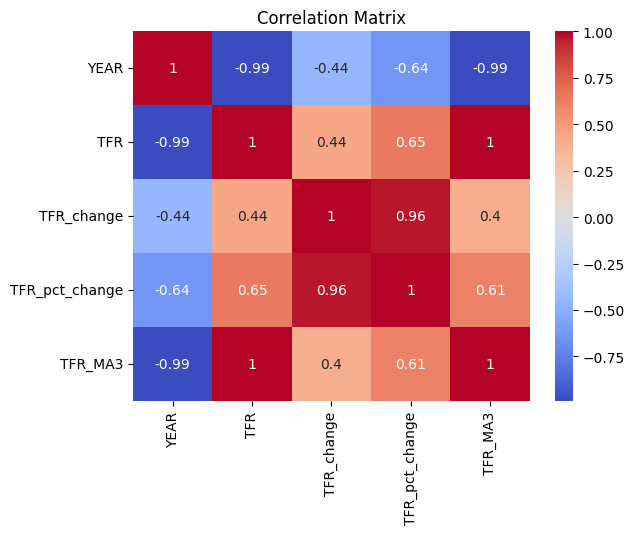

In [46]:
# 7. CORRELATION (If other variables exist)
if df.shape[1] > 2:
    print("\nCORRELATION MATRIX:")
    print(df.corr())

    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()